# Heatmap with multi layer annotation
We first create a dataframe with multi-layer headers

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

# Define the number of samples and the number of cell types (rows)
n_samples = 10  # Number of columns (combinations of Sex, Disease, replicate)
n_cell_types = 20  # Number of rows (cell types)

# Mock data for 'Sex', 'Disease', and 'replicate'
sex = np.random.choice(['Male', 'Female'], n_samples)
disease = np.random.choice(['Control', 'Disease'], n_samples)
replicate = [f'Rep{i+1}' for i in range(n_samples)]

# Create a MultiIndex for the columns
multi_index = pd.MultiIndex.from_arrays([sex, disease, replicate],
                                        names=['Sex', 'Disease', 'replicate'])

# Generate random data for the cell frequencies
np.random.seed(0)  # For reproducibility
data = np.random.rand(n_cell_types, n_samples)  # Correct shape

# Create the DataFrame
cell_freq = pd.DataFrame(data, columns=multi_index)

# Optional: Assign row names to make it more descriptive
cell_freq.index = [f'CellType{i+1}' for i in range(n_cell_types)]

# Display the mock DataFrame
print(cell_freq)

Sex             Male    Female      Male              Female            \
Disease      Disease   Disease   Disease   Control   Control   Disease   
replicate       Rep1      Rep2      Rep3      Rep4      Rep5      Rep6   
CellType1   0.548814  0.715189  0.602763  0.544883  0.423655  0.645894   
CellType2   0.791725  0.528895  0.568045  0.925597  0.071036  0.087129   
CellType3   0.978618  0.799159  0.461479  0.780529  0.118274  0.639921   
CellType4   0.264556  0.774234  0.456150  0.568434  0.018790  0.617635   
CellType5   0.359508  0.437032  0.697631  0.060225  0.666767  0.670638   
CellType6   0.570197  0.438602  0.988374  0.102045  0.208877  0.161310   
CellType7   0.158970  0.110375  0.656330  0.138183  0.196582  0.368725   
CellType8   0.976459  0.468651  0.976761  0.604846  0.739264  0.039188   
CellType9   0.317983  0.414263  0.064147  0.692472  0.566601  0.265389   
CellType10  0.318569  0.667410  0.131798  0.716327  0.289406  0.183191   
CellType11  0.677817  0.270008  0.7351

Then we create lookup tables in order to assign colors for values in given columns.
You can optionally sort one of the headers value for the visualisation (`cell_freq = cell_freq.sort_index(axis = 1, level = 'Disease')`).  

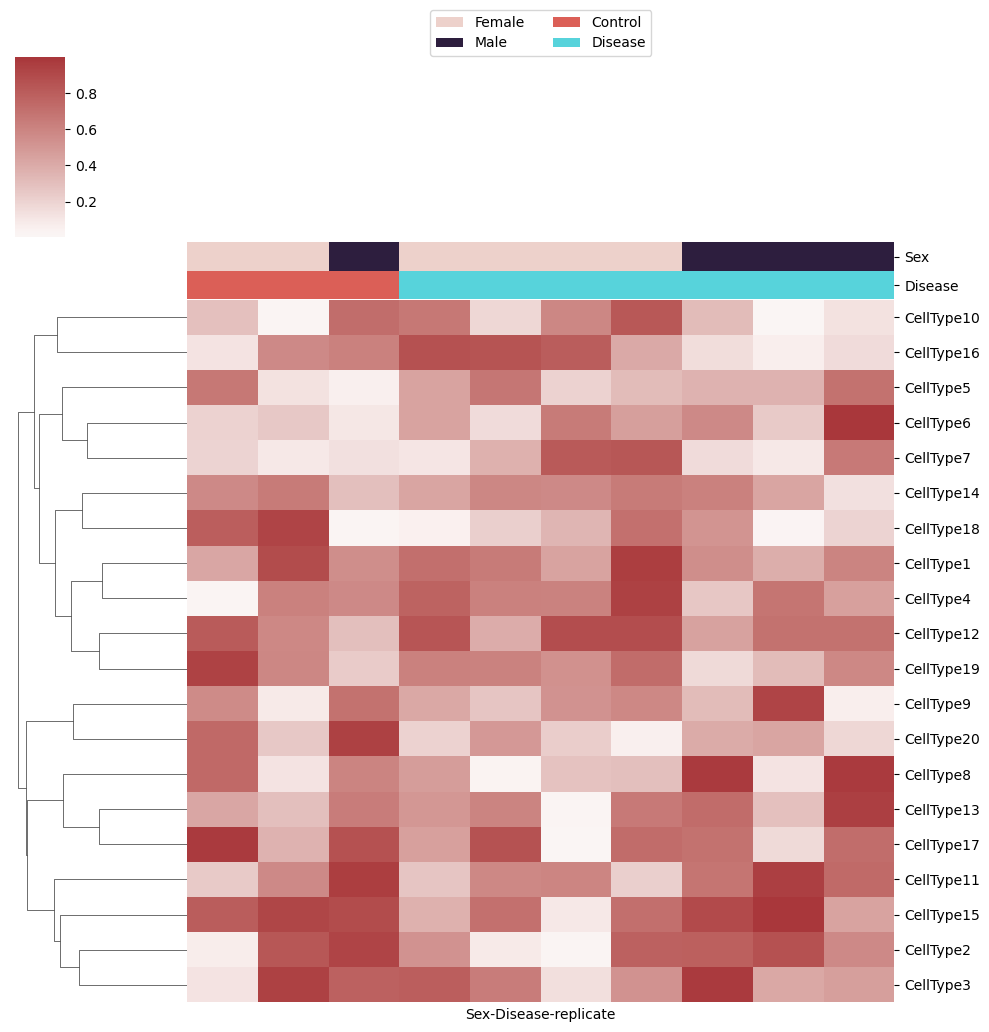

In [5]:
cell_freq = cell_freq.sort_index(axis = 1, level = 'Disease')

## Generating color for Sex
sex = cell_freq.columns.get_level_values('Sex')
sex_pal = sns.cubehelix_palette(sex.unique().size)
sex_lut = dict(zip(map(str, sex.unique()), sex_pal))
sex_colors = pd.Series(sex, index = cell_freq.columns).map(sex_lut)

## Generating color for Disease
disease = cell_freq.columns.get_level_values('Disease')
disease_pal = sns.hls_palette(disease.unique().size)
disease_lut = dict(zip(map(str, disease.unique()), disease_pal))
disease_colors = pd.Series(disease, index = cell_freq.columns).map(disease_lut)

## Generating color for Sample
#replicate = cell_freq.columns.get_level_values('replicate')
#replicate_pal = sns.hls_palette(replicate.unique().size)
#replicate_lut = dict(zip(map(str, replicate.unique()), replicate_pal))
#replicate_colors = pd.Series(replicate, index = cell_freq.columns).map(replicate_lut)


# sex + disease + replicate
#sex_disease_replicate_colors = pd.DataFrame(replicate_colors).join(pd.DataFrame(sex_colors))
#sex_disease_replicate_colors = pd.DataFrame(sex_disease_replicate_colors).join(pd.DataFrame(disease_colors))
# sex + disease
sex_disease_replicate_colors = pd.DataFrame(sex_colors).join(pd.DataFrame(disease_colors))

g = sns.clustermap(cell_freq,
# Turn off the clustering
row_cluster=True, col_cluster=False,
# Add colored class labels using data frame created from node and network colors
#row_colors = network_node_colors,
col_colors = sex_disease_replicate_colors,
# Make the plot look better when many rows/cols
linewidths=0,
xticklabels=False, yticklabels=True,
center=0, cmap="vlag")

# Adding legend manually
for label in sex_lut:
    g.ax_col_dendrogram.bar(0, 0, color=sex_lut[label],
                            label=label, linewidth=0)

for label in disease_lut:
    g.ax_col_dendrogram.bar(0, 0, color=disease_lut[label],
                            label=label, linewidth=0)

# Position the legend outside of the heatmap
g.ax_col_dendrogram.legend(loc="center", ncol=2, bbox_to_anchor=(0.5, 1.1))
